In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import os

df = pd.read_csv('Users/jbirovic/Life Expectancy Data.csv')

print(df.shape)
print("\n")
print(df.head())
print("\n")
print(df.info())
print("\n")
print(df.describe())
print("\n")
print(df.isnull().sum())
print("\n")
df_clean = df.drop(['Country', 'Year'], axis=1).copy()

df_clean['Status'] = df_clean['Status'].map({'Developed': 1, 'Developing': 0})

for column in df_clean.columns:
    if df_clean[column].isnull().sum() > 0:
        df_clean[column] = df_clean[column].fillna(df_clean[column].median())

print("\n")
print("Očiščeni podaci: ")
print("\n")
print(df_clean.isnull().sum())
print("\n")
print(df_clean.info())


(2938, 22)


       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Populati

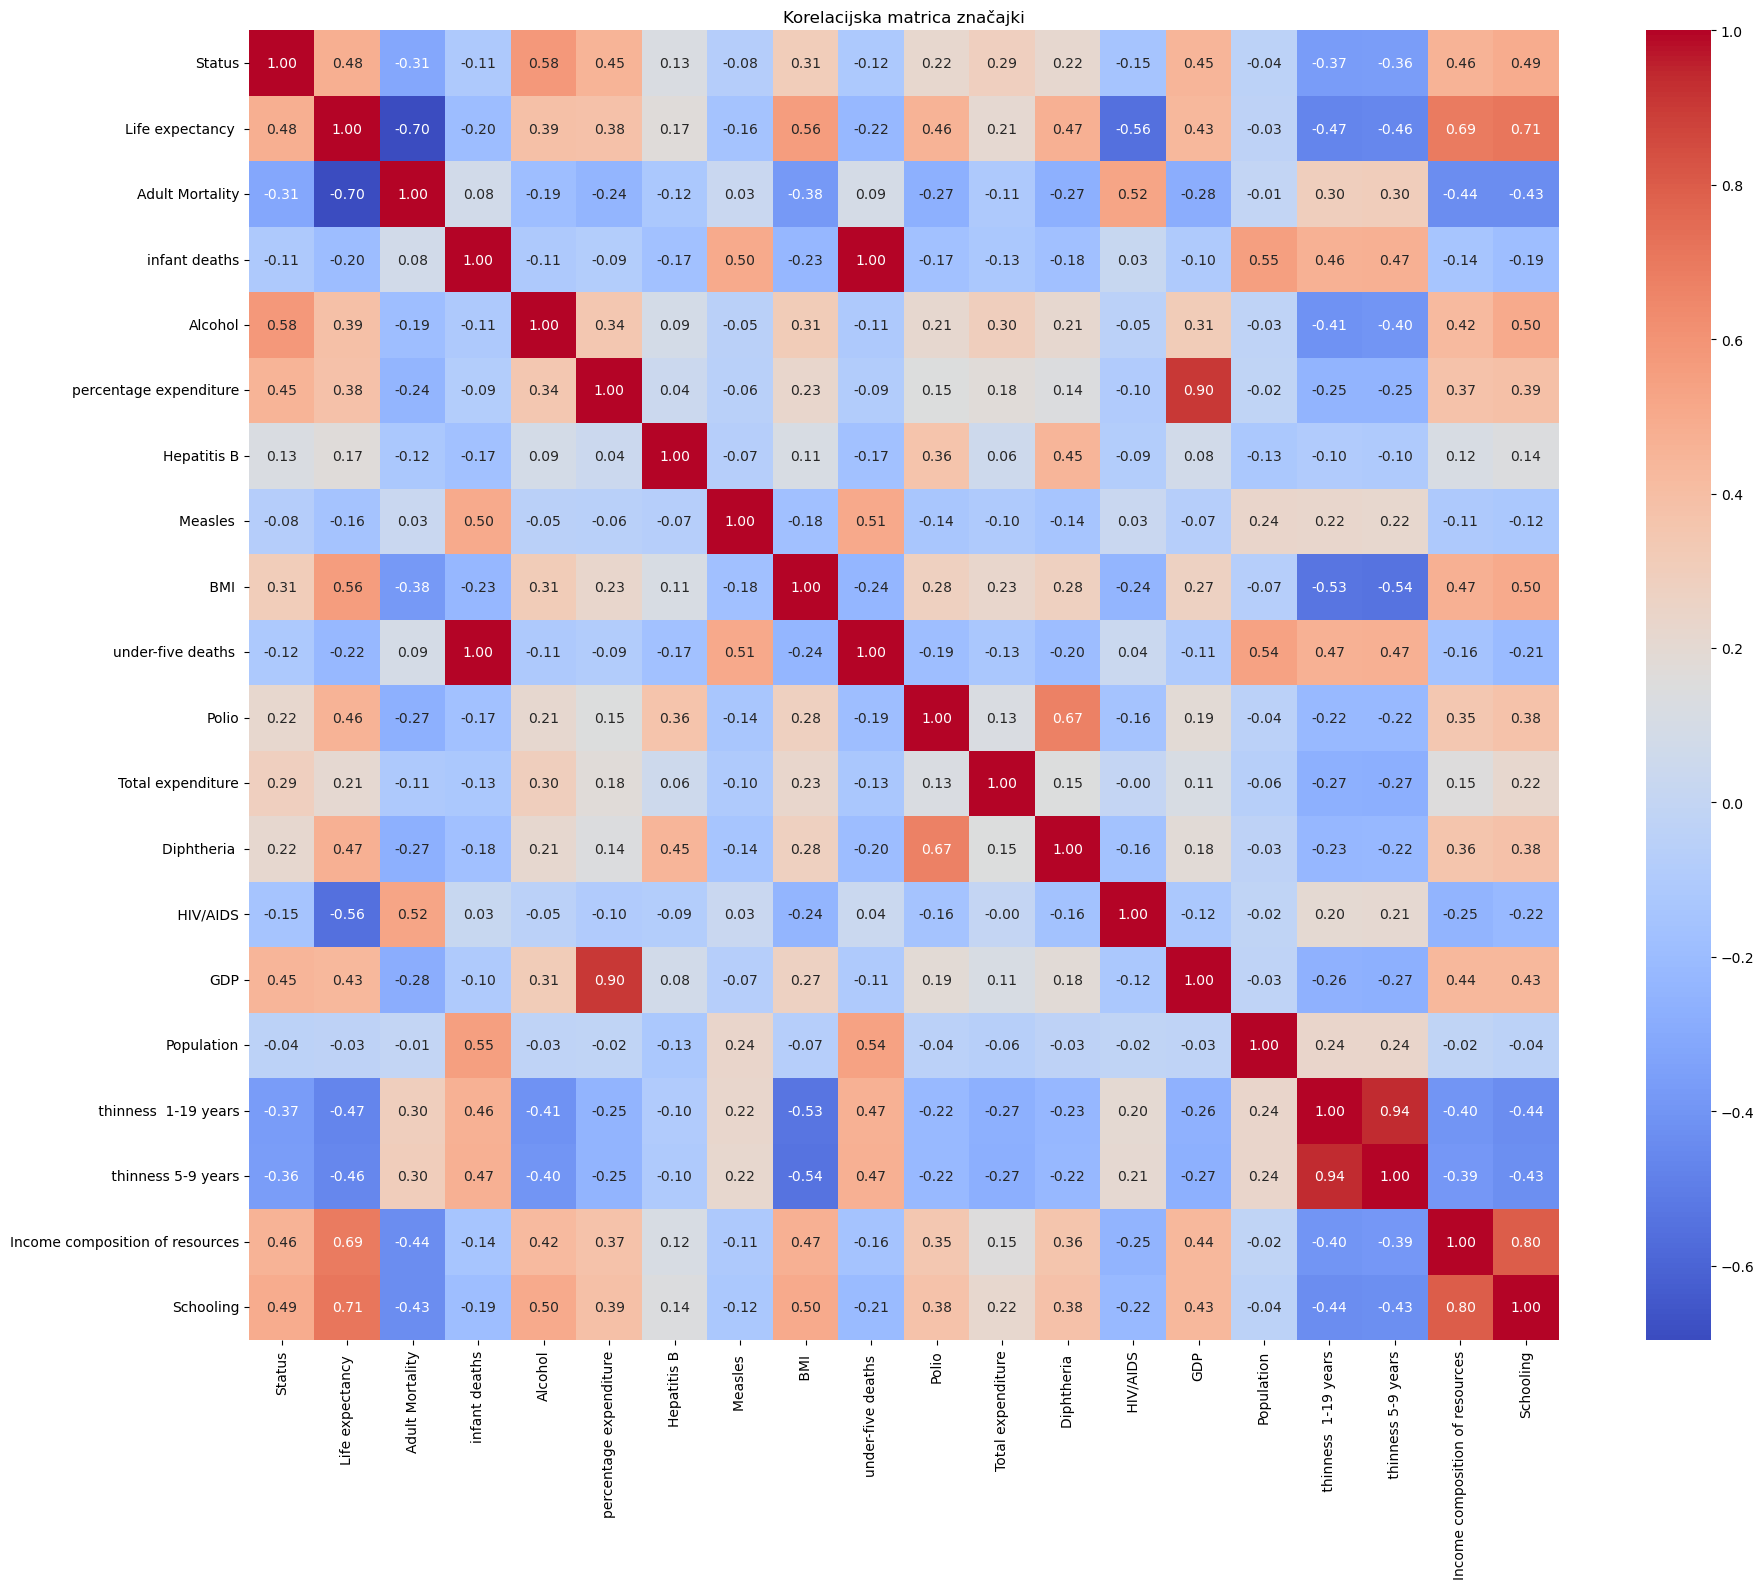


Korelacija sa životnim vijekom: 
Life expectancy                    1.000000
Schooling                          0.713054
Income composition of resources    0.688662
 BMI                               0.556901
Status                             0.481415
Diphtheria                         0.472211
Polio                              0.458399
GDP                                0.430461
Alcohol                            0.388918
percentage expenditure             0.381418
Total expenditure                  0.208844
Hepatitis B                        0.170219
Population                        -0.029014
Measles                           -0.157767
infant deaths                     -0.196769
under-five deaths                 -0.222738
 thinness 5-9 years               -0.462473
 thinness  1-19 years             -0.468002
 HIV/AIDS                         -0.556703
Adult Mortality                   -0.696390
Name: Life expectancy , dtype: float64

Odabrane važne značajke (5): 
['Schooling', 'I

In [2]:
plt.figure(figsize=(20, 16))
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Korelacijska matrica značajki')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

life_exp_corr = correlation_matrix['Life expectancy '].sort_values(ascending=False)
print("\nKorelacija sa životnim vijekom: ")
print(life_exp_corr)

important_features = life_exp_corr[abs(life_exp_corr) > 0.5].index.tolist()
important_features.remove('Life expectancy ')
print(f"\nOdabrane važne značajke ({len(important_features)}): ")
print(important_features)


Veličina trening seta: (2350, 5)
Veličina test seta: (588, 5)

Linear Regression:
  Train MAE: 3.2418 | Test MAE: 3.2141
  Train RMSE: 4.5378 | Test RMSE: 4.4461
  Train R²: 0.7745 | Test R²: 0.7719

Decision Tree:
  Train MAE: 0.8732 | Test MAE: 1.7062
  Train RMSE: 1.3880 | Test RMSE: 2.5395
  Train R²: 0.9789 | Test R²: 0.9256

Random Forest:
  Train MAE: 0.8228 | Test MAE: 1.3067
  Train RMSE: 1.1770 | Test RMSE: 1.8296
  Train R²: 0.9848 | Test R²: 0.9614

Gradient Boosting:
  Train MAE: 1.0470 | Test MAE: 1.4086
  Train RMSE: 1.4523 | Test RMSE: 1.9461
  Train R²: 0.9769 | Test R²: 0.9563



Support Vector Regression:
  Train MAE: 1.5438 | Test MAE: 1.5956
  Train RMSE: 2.4949 | Test RMSE: 2.4306
  Train R²: 0.9318 | Test R²: 0.9318


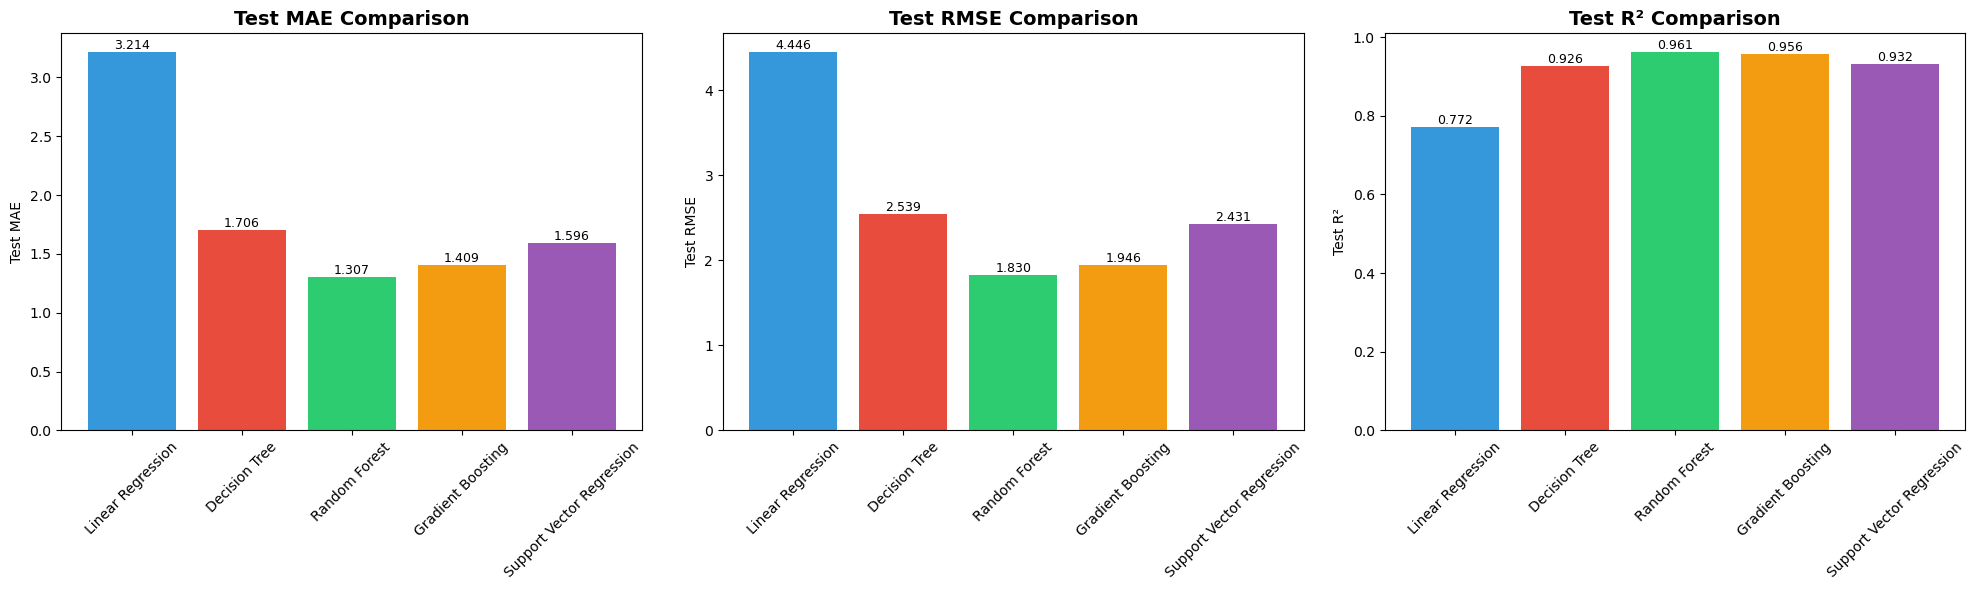

                           Train MAE  Test MAE  Train RMSE  Test RMSE  \
Linear Regression           3.241796  3.214143    4.537829   4.446082   
Decision Tree               0.873183  1.706164    1.388041   2.539481   
Random Forest               0.822805  1.306666    1.176980   1.829561   
Gradient Boosting           1.047037  1.408629    1.452267   1.946082   
Support Vector Regression   1.543849  1.595599    2.494901   2.430643   

                           Train R²   Test R²  
Linear Regression          0.774486  0.771914  
Decision Tree              0.978900  0.925589  
Random Forest              0.984829  0.961378  
Gradient Boosting          0.976902  0.956302  
Support Vector Regression  0.931832  0.931831  


In [3]:
X = df_clean[important_features]
y = df_clean['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nVeličina trening seta: {X_train.shape}")
print(f"Veličina test seta: {X_test.shape}")

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5),
    'Support Vector Regression': SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
}

results = {}


for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    results[name] = {
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R²': train_r2,
        'Test R²': test_r2
    }
    
    print(f"\n{name}:")
    print(f"  Train MAE: {train_mae:.4f} | Test MAE: {test_mae:.4f}")
    print(f"  Train RMSE: {train_rmse:.4f} | Test RMSE: {test_rmse:.4f}")
    print(f"  Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")


fig, axes = plt.subplots(1, 3, figsize=(20, 6))

metrics = ['Test MAE', 'Test RMSE', 'Test R²']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

for idx, metric in enumerate(metrics):
    values = [results[model][metric] for model in results.keys()]
    bars = axes[idx].bar(results.keys(), values, color=colors)
    axes[idx].set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    axes[idx].set_ylabel(metric)
    axes[idx].tick_params(axis='x', rotation=45)
    
    for i, v in enumerate(values):
        axes[idx].text(i, v, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


results_df = pd.DataFrame(results).T
print(results_df)



Važnost značajki:
                           feature  importance
3                         HIV/AIDS    0.606157
1  Income composition of resources    0.177981
4                  Adult Mortality    0.162607
2                             BMI     0.031894
0                        Schooling    0.021362


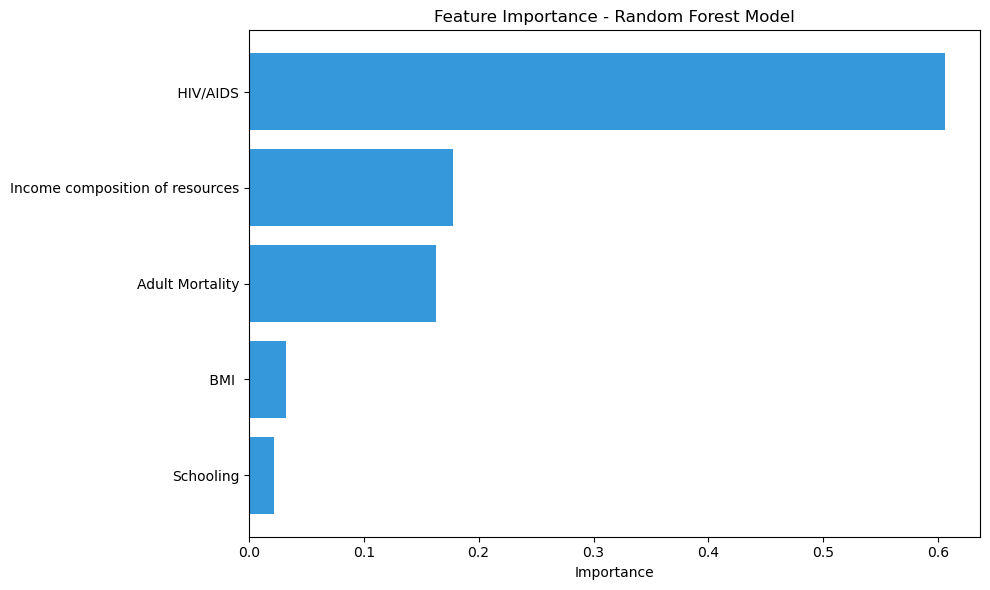


Odabrane značajke za API:
['Schooling', 'Income composition of resources', ' BMI ', ' HIV/AIDS', 'Adult Mortality']


In [4]:

best_model = models['Random Forest']

feature_importance = pd.DataFrame({
    'feature': important_features,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nVažnost značajki:")
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='#3498db')
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

os.makedirs("models", exist_ok=True)

joblib.dump(best_model, "models/life_expectancy_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")
joblib.dump(important_features, "models/features.pkl")

print("\nOdabrane značajke za API:")
print(important_features)